In [242]:
# Import the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')      # Ignore seaborn warning messages

In [243]:
# Import the dataset 

realestate = pd.read_csv('regression_data_clean.csv')

In [244]:
realestate.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [245]:
realestate.tail()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
21592,263000018,5/21/14,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2/23/15,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,6/23/14,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,1/16/15,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000
21596,1523300157,10/15/14,2,0.75,1020,1076,2.0,0,0,3,...,1020,0,2008,0,98144,47.5941,-122.299,1020,1357,325000


In [246]:
realestate.shape            # Check number of columns and rows in the dataframe

(21597, 21)

In [247]:
realestate.columns          # Check the column names

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [248]:
# Since columns are already in a standardised format no changes are made

In [249]:
realestate.dtypes               # Checking the data types

id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

In [250]:
# Change date column to datatype 'date'. 
# Leaving this column like this for now as it will be drop before defining the model.

realestate['date'] = pd.to_datetime(realestate['date'], errors = 'coerce')

In [251]:
# Since all other columns are in a numerical format I leave them like this for now. 

In [252]:
realestate.dtypes            # Checking the updated datatype for date

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [253]:
realestate.info()     # Further explore the different columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [254]:
realestate.isnull().any()         # Checking for null values

id               False
date             False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
price            False
dtype: bool

In [255]:
realestate.isnull().sum()*100/realestate.shape[0]        # Confirming zero null values

id               0.0
date             0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
price            0.0
dtype: float64

In [256]:
realestate.nunique()        # Checking the unique values of each column

id               21420
date               372
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
price             3622
dtype: int64

In [257]:
realestate['id'].value_counts()       # Note that there are some duplicate values in the ID column

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [258]:
# Check duplicate values

duplicate_id = realestate[realestate.duplicated(subset=['id'], keep=False)]

duplicate_id.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
93,6021501535,2014-07-25,3,1.50,1580,5000,1.0,0,0,3,...,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,430000
94,6021501535,2014-12-23,3,1.50,1580,5000,1.0,0,0,3,...,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,700000
313,4139480200,2014-06-18,4,3.25,4290,12103,1.0,0,3,3,...,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,1380000
314,4139480200,2014-12-09,4,3.25,4290,12103,1.0,0,3,3,...,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,1400000
324,7520000520,2014-09-05,2,1.00,1240,12092,1.0,0,0,3,...,960,280,1922,1984,98146,47.4957,-122.352,1820,7460,232000


In [259]:
# Since the duplicate ID's seem to be for the same property but at a different date and at a different price
# I decide to keep them. This could indicate that the property was sold more than once
# and could be important for our analysis.

In [260]:
realestate.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [261]:
# One of the houses have 33 rooms and must be very large. I want to analyse this further. 

realestate[(realestate.bedrooms == 33)]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
15856,2402100895,2014-06-25,33,1.75,1620,6000,1.0,0,0,5,...,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,640000


In [262]:
# 33 rooms but only 1.75 toilets and 4700 squarefeet. This could be a typo. 
# I would regard this as bad data. 
# However since we do not have any evidence I am going to keep it for now.

In [263]:
# Looking into the details of the most expensive house 

realestate[(realestate.price == 7700000)]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
7245,6762700020,2014-10-13,6,8.0,12050,27600,2.5,0,3,4,...,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,7700000


In [264]:
# All columns are already in a numeric format, however, since some variables are discrete
# and others are continuous in nature I will create two dataframes and explore the correlation
# of each independent variable with the dependent variable 'price' using different visualisations

In [265]:
# Visualising using scatter plot

In [266]:
realestate_con = realestate.drop(['id', 'date', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'lat', 'long', 'zipcode', 'floors'], axis = 1)

In [267]:
realestate_con.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

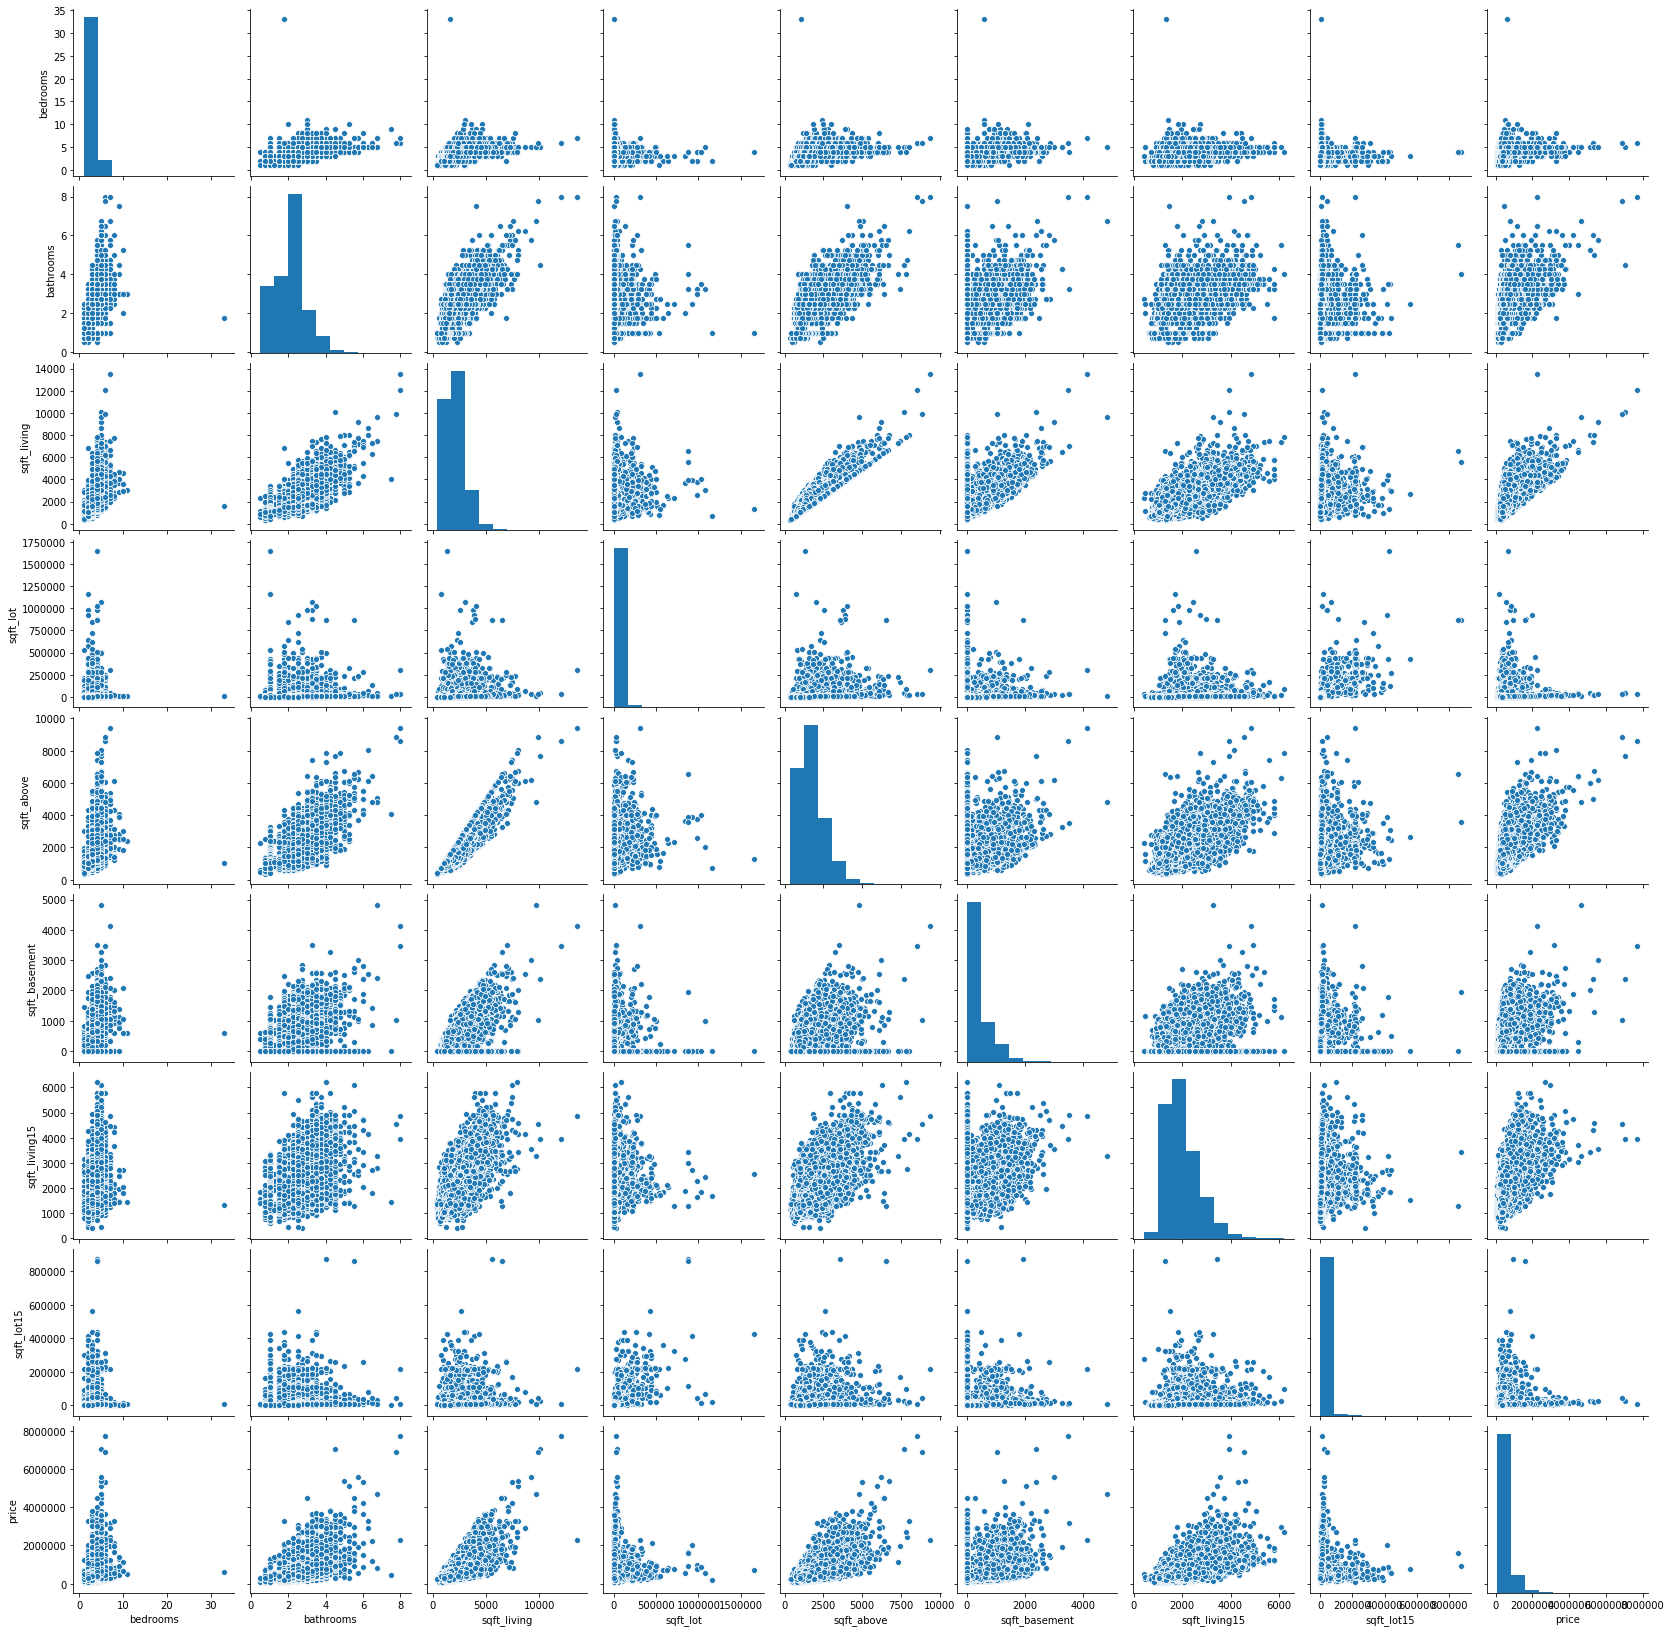

In [268]:
# Checking how the numerical variables correlate to the target variable 'price'

sns.pairplot(realestate_con)
plt.show()

In [269]:
# From the scatter plots we see that there seem to be a positive correlation in selling price and
# bathrooms, sqft_living, sqft_above, sqft_basement and sqft_living15
# No appearent corraltion between price and bedrooms

In [270]:
# Visualising using boxplot

In [271]:
# Creating a dataframe for variables of 'categorical nature'

realestate_dis = realestate.drop(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'zipcode', 'sqft_living15', 'sqft_lot15', 'long', 'lat'], axis = 1)


In [272]:
# Print the columns to see which variables to box plot

realestate_dis.columns

Index(['waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated',
       'price'],
      dtype='object')

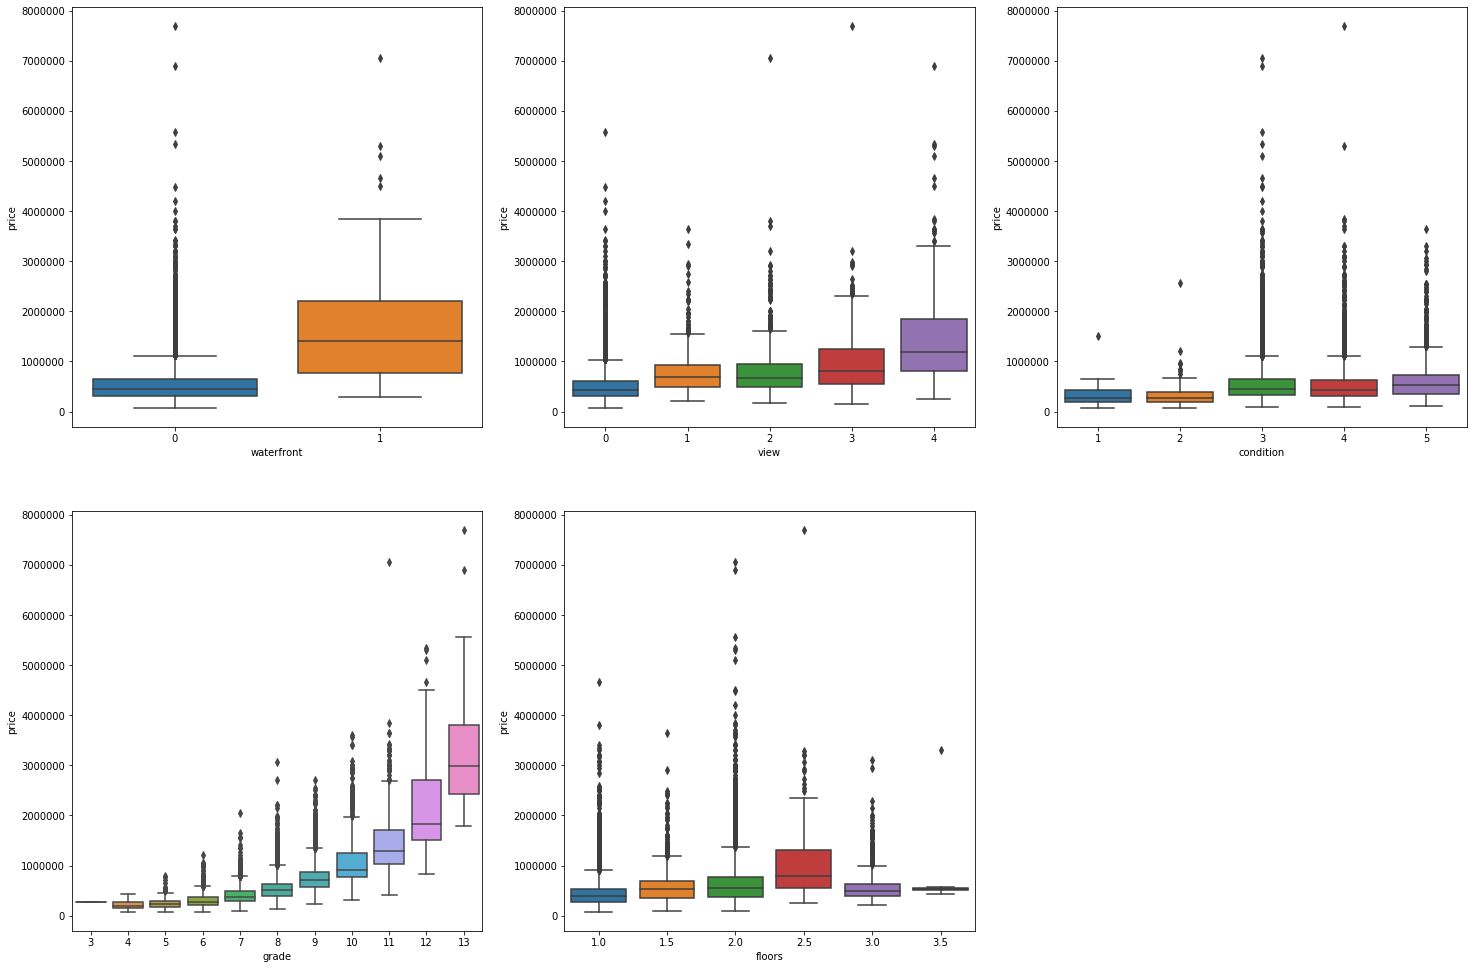

In [273]:
# Using box plots checking the correlation between selling price and variables that are categorical in nature

plt.figure(figsize=(25, 17))
plt.subplot(2,3,1)
sns.boxplot(x = 'waterfront', y = 'price', data = realestate)
plt.subplot(2,3,2)
sns.boxplot(x = 'view', y = 'price', data = realestate)
plt.subplot(2,3,3)
sns.boxplot(x = 'condition', y = 'price', data = realestate)
plt.subplot(2,3,4)
sns.boxplot(x = 'grade', y = 'price', data = realestate)
plt.subplot(2,3,5)
sns.boxplot(x = 'floors', y = 'price', data = realestate)
plt.show()

In [274]:
# We notice that the overall grade seem to play a big role in deciding the price of a house
# View and waterfront also seem to be positively correlated
# No appearent correlation for floors and condition

In [275]:
# It can be debated whether bathrooms, bedrooms and floors should be considered continuous or discrete
# Generally discrete values are whole numbers only, but due to the distribution of 'floors'
# I included this variable in the box plot visualisations

In [276]:
# I group number of bathrooms to reduce redundant values 

bathroom_labels = ['0-2', '3-5', '6-8']
def grouping_bath(x):
    if x < 3:
        return '0-2'
    elif x > 5:
        return '6-8'
    else:
        return '3-5'

realestate["bathrooms"] = list(map(grouping_bath, realestate["bathrooms"]))


In [277]:
realestate['bathrooms'].value_counts()       # Checking the values in each group

0-2    18967
3-5     2587
6-8       43
Name: bathrooms, dtype: int64

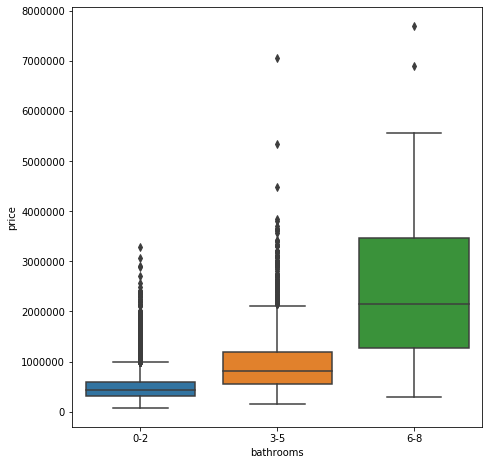

In [278]:
plt.figure(figsize=(25, 17))
plt.subplot(2,3,1)
sns.boxplot(x = 'bathrooms', y = 'price', data = realestate);

In [279]:
# We still see a positive correlation in the number of bathrooms and selling price

In [280]:
# I encode bathrooms columns to numerical values using one hot encoder

import category_encoders as ce    # import the library

In [281]:
encoder = ce.OneHotEncoder(cols='bathrooms',return_df = True, use_cat_names = True)

In [282]:
realestate_transformed = encoder.fit_transform(realestate)

In [283]:
realestate_transformed.head()

,id,date,bedrooms,bathrooms_0-2,bathrooms_3-5,bathrooms_6-8,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1,0,0,1180,5650,1.0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,1,0,0,2570,7242,2.0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1,0,0,770,10000,1.0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,0,1,0,1960,5000,1.0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,1,0,0,1680,8080,1.0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [284]:
grade_labels = ['Low', 'Medium', 'High']
def grouping_grade(x):
    if x < 6:
        return 'Low'
    elif x > 10:
        return 'High'
    else:
        return 'Medium'

realestate_transformed["grade"] = list(map(grouping_grade, realestate_transformed["grade"]))

In [285]:
realestate_transformed['grade'].value_counts()       # Checking the values in each group

Medium    20826
High        501
Low         270
Name: grade, dtype: int64

In [298]:
# Transform categorical values to binary with onehotencoder

encoder = ce.OneHotEncoder(cols='grade',return_df = True, use_cat_names = True)
realestate_transformed = encoder.fit_transform(realestate_transformed)

In [299]:
realestate_transformed.head()

,id,date,bedrooms,bathrooms_0-2,bathrooms_3-5,bathrooms_6-8,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1,0,0,1180,5650,1.0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,1,0,0,2570,7242,2.0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1,0,0,770,10000,1.0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,0,1,0,1960,5000,1.0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,1,0,0,1680,8080,1.0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [300]:
# Checking for correlation using a correlation matrix

corr_matrix = realestate_transformed.corr()
corr_matrix

,id,bedrooms,bathrooms_0-2,bathrooms_3-5,bathrooms_6-8,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,1.000000,0.001150,0.017238,-0.016068,-0.009419,-0.012241,-0.131911,0.018608,-0.002727,0.011536,...,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557,-0.016772
bedrooms,0.001150,1.000000,-0.328102,0.317212,0.096387,0.578212,0.032471,0.177944,-0.006834,0.080008,...,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.308787
bathrooms_0-2,0.017238,-0.328102,1.000000,-0.990669,-0.119948,-0.529405,-0.082527,-0.269449,-0.060776,-0.185454,...,-0.455453,-0.246334,-0.194368,-0.077521,0.023753,-0.071971,-0.040539,-0.352528,-0.067259,-0.450491
bathrooms_3-5,-0.016068,0.317212,-0.990669,1.000000,-0.016477,0.503020,0.073692,0.266548,0.055154,0.177302,...,0.432571,0.234399,0.191357,0.075114,-0.020786,0.071005,0.038113,0.342662,0.058970,0.420445
bathrooms_6-8,-0.009419,0.096387,-0.119948,-0.016477,1.000000,0.219715,0.068645,0.035134,0.044113,0.069024,...,0.190356,0.099743,0.032038,0.021560,-0.022846,0.010777,0.019777,0.090194,0.063875,0.242281
sqft_living,-0.012241,0.578212,-0.529405,0.503020,0.219715,1.000000,0.173453,0.353953,0.103854,0.284709,...,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342,0.701917
sqft_lot,-0.131911,0.032471,-0.082527,0.073692,0.068645,0.173453,1.000000,-0.004814,0.021632,0.074900,...,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.089876
floors,0.018608,0.177944,-0.269449,0.266548,0.035134,0.353953,-0.004814,1.000000,0.023755,0.028814,...,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.256804
waterfront,-0.002727,-0.006834,-0.060776,0.055154,0.044113,0.103854,0.021632,0.023755,1.000000,0.401971,...,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781,0.266398
view,0.011536,0.080008,-0.185454,0.177302,0.069024,0.284709,0.074900,0.028814,0.401971,1.000000,...,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904,0.397370


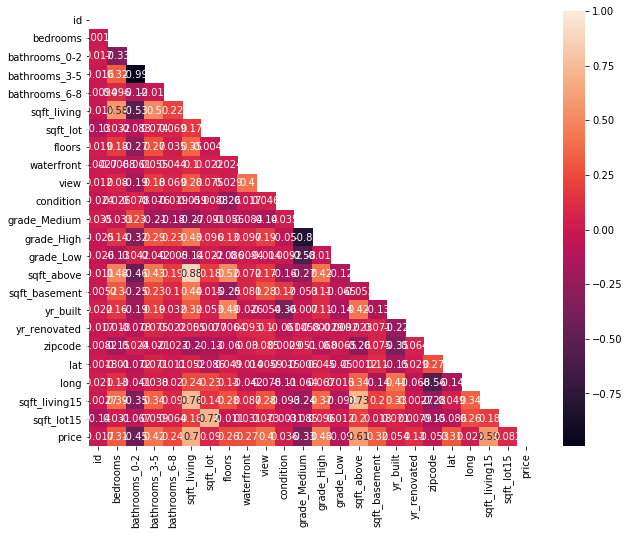

In [314]:
# Checking for correlations and multicorrilineraity using a heatmap

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.show()

In [315]:
# Since I suspect there might be high multicorrilineraity between some of the variables 
# I also check for multicorrilinearity using VIF

X = realestate_transformed.drop(['price', 'id', 'date'], axis=1)         # I drop column 'id' and 'date'

In [316]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [317]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

In [318]:
vif

,VIF,variable
0,1.612890,bedrooms
1,inf,bathrooms_0-2
2,inf,bathrooms_3-5
3,inf,bathrooms_6-8
4,inf,sqft_living
5,2.101827,sqft_lot
6,1.877153,floors
7,1.204796,waterfront
8,1.430144,view
9,1.247337,condition


In [495]:
# I drop columns to attempt reduce multicorrilineraity 

X = realestate_transformed.drop(['price', 'id', 'date', 'yr_built', 'sqft_living', 'bathrooms_0-2', 'bathrooms_6-8', 'grade_Low', 'grade_Medium', 'long', 'lat', 'bedrooms', 'waterfront', 'floors', 'condition', 'zipcode', 'sqft_lot15', 'sqft_lot', 'yr_renovated'], axis=1)

In [496]:
vif1 = pd.DataFrame()
vif1['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif1['variable'] = X.columns

In [497]:
vif1        # No high multicorrilineraity

,VIF,variable
0,1.483857,bathrooms_3-5
1,1.244620,view
2,1.193862,grade_High
3,15.723351,sqft_above
4,1.838679,sqft_basement
5,16.728894,sqft_living15


In [498]:
realestate_reduced = realestate_transformed.drop(['id', 'date', 'yr_built', 'sqft_above', 'bathrooms_0-2', 'bathrooms_6-8', 'grade_Low', 'grade_Medium', 'long', 'lat', 'bedrooms', 'sqft_living15', 'floors', 'condition', 'zipcode', 'sqft_lot15', 'sqft_lot', 'yr_renovated'], axis=1)


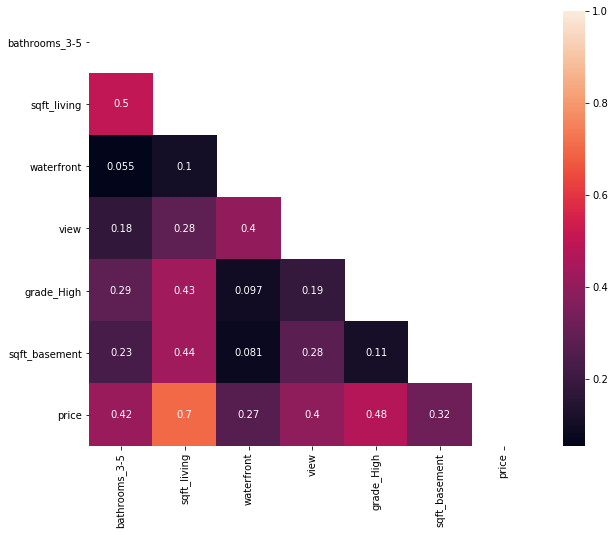

In [499]:
corr_matrix1 = realestate_reduced.corr()
mask = np.zeros_like(corr_matrix1)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix1, mask=mask, annot=True)
plt.show()

In [500]:
X = realestate_reduced

In [524]:
realestate_final = realestate_transformed[['price', 'sqft_living15', 'sqft_above', 'grade_High', 'bathrooms_3-5', 'view', 'sqft_basement']]

In [525]:
# The final choice of variables for the first time running the model

realestate_final

,price,sqft_living15,sqft_above,grade_High,bathrooms_3-5,view,sqft_basement
0,221900,1340,1180,0,0,0,0
1,538000,1690,2170,0,0,0,400
2,180000,2720,770,0,0,0,0
3,604000,1360,1050,0,1,0,910
4,510000,1800,1680,0,0,0,0
...,...,...,...,...,...,...,...
21592,360000,1530,1530,0,0,0,0
21593,400000,1830,2310,0,0,0,0
21594,402101,1020,1020,0,0,0,0
21595,400000,1410,1600,0,0,0,0


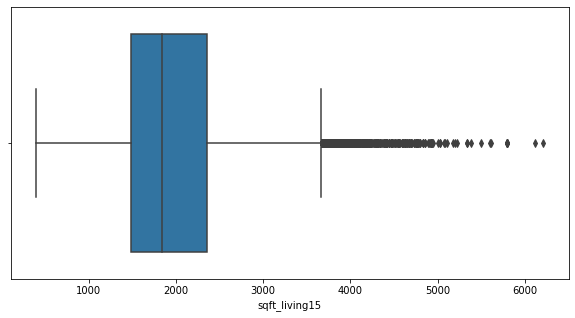

In [526]:
# Outlier Analysis

fig, axs = plt.subplots(figsize = (10,5))
plt1 = sns.boxplot(realestate['sqft_living15'])

plt.show()

In [527]:
# To avoid affecting the performance of the model I remove the outliers in 
# sqft_living using the interquartile range 1.5 method

# Find the interquantile range

q1 = realestate_final['sqft_living15'].quantile(.25)
q3 = realestate_final['sqft_living15'].quantile(.75)
iqr = q3 - q1

In [528]:
# Create a variable for the median

median = realestate_final['sqft_living15'].median()

In [529]:
# Find the upper and lower limit for removing outliers

outlier_limit_upper = median + 1.5*iqr
outlier_limit_lower = median - 1.5*iqr

In [530]:
# Exclude values from the column that are above or below the upper/lower limit

realestate_mod = realestate_final[realestate_final['sqft_living15'] < outlier_limit_upper]

In [531]:
realestate_mod_2 = realestate_mod[realestate_mod['sqft_living15'] > outlier_limit_lower]

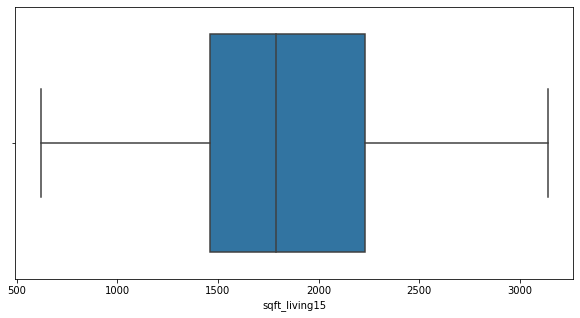

In [532]:
# Amended result

fig, axs = plt.subplots(figsize = (10,5))
plt1 = sns.boxplot(realestate_mod_2['sqft_living15'])

plt.show()

In [533]:
realestate_mod_2

,price,sqft_living15,sqft_above,grade_High,bathrooms_3-5,view,sqft_basement
0,221900,1340,1180,0,0,0,0
1,538000,1690,2170,0,0,0,400
2,180000,2720,770,0,0,0,0
3,604000,1360,1050,0,1,0,910
4,510000,1800,1680,0,0,0,0
...,...,...,...,...,...,...,...
21592,360000,1530,1530,0,0,0,0
21593,400000,1830,2310,0,0,0,0
21594,402101,1020,1020,0,0,0,0
21595,400000,1410,1600,0,0,0,0


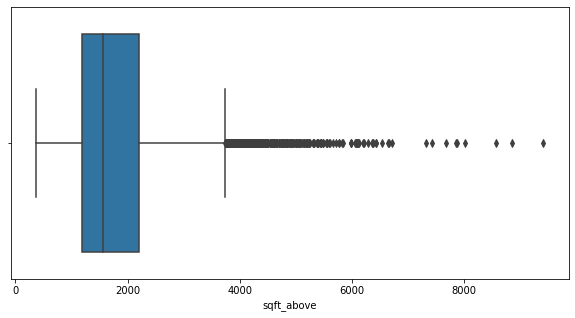

In [552]:
# Outlier Analysis

fig, axs = plt.subplots(figsize = (10,5))
plt1 = sns.boxplot(realestate['sqft_above'])

plt.show()

In [553]:
q1_1 = realestate_final['sqft_above'].quantile(.25)
q3_1 = realestate_final['sqft_above'].quantile(.75)
iqr_1 = q3_1 - q1_1
median_1 = realestate_final['sqft_above'].median()
outlier_limit_upper_1 = median_1 + 1.5 * iqr_1
outlier_limit_lower_1 = median_1 - 1.5 * iqr_1

In [554]:
realestate_mod_3 = realestate_mod_2[realestate_mod_2['sqft_above'] < outlier_limit_upper]
realestate_mod_4 = realestate_mod_3[realestate_mod_3['sqft_above'] > outlier_limit_lower]

In [555]:
realestate_final = realestate_mod_4

In [594]:
realestate_final

,price,sqft_living15,sqft_above,grade_High,bathrooms_3-5,view,sqft_basement
0,221900,-0.986934,-0.730059,0,0,-0.273795,-0.680846
1,538000,-0.298989,0.972536,0,0,-0.273795,0.289718
2,180000,1.725533,-1.435175,0,0,-0.273795,-0.680846
3,604000,-0.947623,-0.953633,0,1,-0.273795,1.527186
4,510000,-0.082778,0.129837,0,0,-0.273795,-0.680846
...,...,...,...,...,...,...,...
19371,360000,-0.613478,-0.128132,0,0,-0.273795,-0.680846
19372,400000,-0.023812,1.213307,0,0,-0.273795,-0.680846
19373,402101,-1.615912,-1.005226,0,0,-0.273795,-0.680846
19374,400000,-0.849345,-0.007746,0,0,-0.273795,-0.680846


In [595]:
# Reset index after values have been removed

realestate_final = realestate_final.reset_index(drop=True)
realestate_final

,price,sqft_living15,sqft_above,grade_High,bathrooms_3-5,view,sqft_basement
0,221900,-0.986934,-0.730059,0,0,-0.273795,-0.680846
1,538000,-0.298989,0.972536,0,0,-0.273795,0.289718
2,180000,1.725533,-1.435175,0,0,-0.273795,-0.680846
3,604000,-0.947623,-0.953633,0,1,-0.273795,1.527186
4,510000,-0.082778,0.129837,0,0,-0.273795,-0.680846
...,...,...,...,...,...,...,...
19371,360000,-0.613478,-0.128132,0,0,-0.273795,-0.680846
19372,400000,-0.023812,1.213307,0,0,-0.273795,-0.680846
19373,402101,-1.615912,-1.005226,0,0,-0.273795,-0.680846
19374,400000,-0.849345,-0.007746,0,0,-0.273795,-0.680846


In [596]:
# Define X and the target variable y

X = realestate_final.drop(['price'], axis = 1)
y = realestate_final['price']

In [597]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

# Define normalizer

# transformer = Normalizer().fit(X)

In [598]:
# X = transformer.transform(X)

In [599]:
# Rescale all columns except 'bathrooms_3-5'

columns = X.columns.drop(['bathrooms_3-5', 'grade_High']) 

def scale_data(data, columns, scaler):
    for col in columns:
        data[col] = scaler.fit_transform(data[col].values.reshape(-1, 1))
    return data

realestate_final_1 = scale_data(realestate_final, columns, StandardScaler())

In [600]:
X = realestate_final_1.drop(['price'], axis = 1)

In [601]:
# Final X ready for modelling

X

,sqft_living15,sqft_above,grade_High,bathrooms_3-5,view,sqft_basement
0,-0.986934,-0.730059,0,0,-0.273795,-0.680846
1,-0.298989,0.972536,0,0,-0.273795,0.289718
2,1.725533,-1.435175,0,0,-0.273795,-0.680846
3,-0.947623,-0.953633,0,1,-0.273795,1.527186
4,-0.082778,0.129837,0,0,-0.273795,-0.680846
...,...,...,...,...,...,...
19371,-0.613478,-0.128132,0,0,-0.273795,-0.680846
19372,-0.023812,1.213307,0,0,-0.273795,-0.680846
19373,-1.615912,-1.005226,0,0,-0.273795,-0.680846
19374,-0.849345,-0.007746,0,0,-0.273795,-0.680846


In [602]:
# Split into test and train datasets

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

In [603]:
X_train

,sqft_living15,sqft_above,grade_High,bathrooms_3-5,view,sqft_basement
8915,-0.220367,-1.056820,0,0,-0.273795,-0.680846
8503,0.231711,-0.523684,0,0,-0.273795,0.119869
9946,-0.711756,0.387806,0,0,-0.273795,-0.680846
359,-0.102434,-0.007746,0,0,-0.273795,-0.680846
18659,-0.298989,-0.953633,0,0,-0.273795,0.313982
...,...,...,...,...,...,...
11284,-0.318645,1.780839,0,0,-0.273795,-0.680846
11964,1.234144,1.488474,0,0,-0.273795,-0.680846
5390,0.644477,-0.472090,0,0,-0.273795,0.823527
860,-0.161400,1.037888,0,0,-0.273795,-0.680846


In [604]:
X_test

,sqft_living15,sqft_above,grade_High,bathrooms_3-5,view,sqft_basement
9674,-0.397267,-0.110934,0,0,-0.273795,2.424957
6178,0.585511,0.198629,0,0,2.693233,-0.680846
7048,0.271022,-0.626872,0,0,-0.273795,0.532358
4391,-1.419356,-0.764455,0,0,-0.273795,-0.680846
14962,-0.259678,0.748963,0,0,-0.273795,-0.680846
...,...,...,...,...,...,...
2688,0.900000,1.196109,0,0,-0.273795,-0.680846
1714,0.290677,0.852151,0,0,1.209719,1.575714
11000,0.939311,0.817755,0,0,-0.273795,-0.680846
5928,-0.751067,-1.091216,0,0,-0.273795,-0.147036


In [605]:
y_train

8915     280000
8503     246000
9946     360000
359      330000
18659    497000
          ...  
11284    377500
11964    625000
5390     560000
860      650000
15795    389950
Name: price, Length: 15500, dtype: int64

In [606]:
y_test

9674     456700
6178     772500
7048     280000
4391     175000
14962    435000
          ...  
2688     392000
1714     590000
11000    490000
5928     500000
14129    260000
Name: price, Length: 3876, dtype: int64

In [607]:
from sklearn.linear_model import LinearRegression as LinReg

# Define and fit the model

linreg = LinReg()    
linreg.fit(X_train, y_train)   
y_pred_linreg = linreg.predict(X_test)   

In [608]:
y_pred_linreg

array([574432.00094788, 593846.15739982, 448063.48987915, ...,
       508873.77363921, 334089.48505815, 356544.12083623])

In [609]:
# Evaluate the model

print ('train R2: {} -- test R2: {}'.format(linreg.score(X_train, y_train),
                                            linreg.score(X_test, y_test)))

train R2: 0.4137840984372283 -- test R2: 0.37840943456417886


In [610]:
from sklearn.metrics import mean_squared_error as mse

train_mse=mse(linreg.predict(X_train), y_train)
test_mse=mse(linreg.predict(X_test), y_test)

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 33406151048.095364 -- test MSE: 33319889328.589573


In [611]:
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train RMSE: 182773.49656910152 -- test RMSE: 182537.3641986472


In [612]:
from sklearn.metrics import mean_absolute_error as mae

train_mae=mae(linreg.predict(X_train), y_train)
test_mae=mae(linreg.predict(X_test), y_test)

print ('train MAE: {} -- test MAE: {}'.format(train_mse, test_mse))

train MAE: 33406151048.095364 -- test MAE: 33319889328.589573


In [613]:
# KNN

# Define the model

from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors = 4) # We use a K of 4
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [614]:
# Get our prediction

knn_predictions = knn_model.predict(X_test)


In [615]:
# Our error metrics to evaluate the model

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE = mean_absolute_error(y_test,knn_predictions)
MSE = mean_squared_error(y_test,knn_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,knn_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is: 149418.07
The mean squared error of the model in the test set is: 39710057874.34
The root mean squared error of the model in the test set is: 199273.83
The R2 of the model in the test set is: 0.26


# How to interpret the results


# MAE 
A small MAE suggests the model is great at prediction, while a large MAE suggests that your model may have trouble in certain areas. A MAE of 0 means that your model is a perfect predictor of the outputs (but this will almost never happen).

# MSE & RMSE

MSE and RMSE both square the residual, they are similarly affected by outliers. The RMSE is analogous to the standard deviation (MSE to variance) and is a measure of how large your residuals are spread out. Both MAE and MSE can range from 0 to positive infinity, so as both of these measures get higher, it becomes harder to interpret how well your model is performing.

# R2
R2 is the percentage of the response variable variation that is explained by a linear model. R-squared is always between 0 and 100%:

0% indicates that the model explains none of the variability of the response data around its mean.
100% indicates that the model explains all the variability of the response data around its mean.